## The Learning Rate

In [4]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [5]:
def f(x):
    return x**2 + x + 1

In [6]:
# Make some data
x_2 = np.linspace(-2, 2, 1000)

# Write the g(x) and d(x) function
def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

In [16]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]
    
    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient
        
        step_size = abs(new_x - previous_x)
        x_list.append(new_x) 
        slope_list.append(derivative_func(new_x))
        
        if step_size < precision:
            break
            
    return new_x, x_list, slope_list

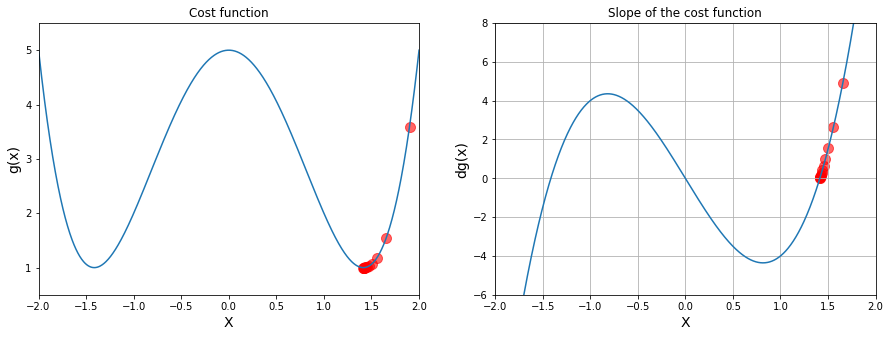

In [17]:
# calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.02)

# plot function, derivative and scatter plot side by side 
plt.figure(figsize=[15, 5])

plt.subplot(1, 2, 1)

plt.xlim([-2, 2])
plt.ylim(0.5, 5.5)
plt.title("Cost function")
plt.xlabel("X", fontsize=14)
plt.ylabel("g(x)", fontsize=14)

plt.plot(x_2, g(x_2))
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

plt.subplot(1, 2, 2)
plt.xlim([-2, 2])
plt.ylim(-6, 8)
plt.title("Slope of the cost function")
plt.xlabel("X", fontsize=14)
plt.ylabel("dg(x)", fontsize=14)
plt.grid()

plt.plot(x_2, dg(x_2))
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.6)

plt.show()

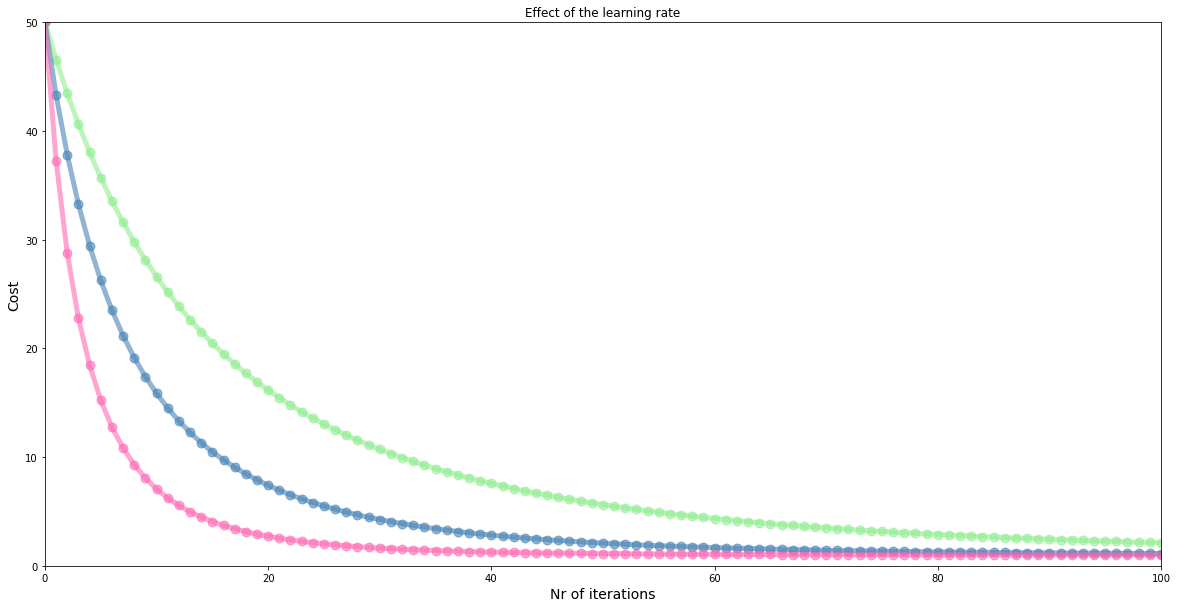

In [24]:
# run gradient descent 3 times
n = 100
low_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.0005,
                                                 precision=0.0001, max_iter=n)
mid_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.001,
                                                 precision=0.0001, max_iter=n)
high_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.002,
                                                 precision=0.0001, max_iter=n)

# plotting reduction in cost for each iteration
plt.figure(figsize=[20, 10])

plt.xlim([0, n])
plt.ylim(0, 50)
plt.title("Effect of the learning rate")
plt.xlabel("Nr of iterations", fontsize=14)
plt.ylabel("Cost", fontsize=14)

# values for our charts
# 1) Y Axis data: convert the lists to numpy arrays
low_values = np.array(low_gamma[1])

# 2) X Axis data: create a list from 0 to n+1
iteration_list = list(range(0, n+1))

# plotting low learning rate
plt.plot(iteration_list, g(low_values), color='lightgreen', linewidth=5, alpha=0.6)
plt.scatter(iteration_list, g(low_values), color='lightgreen', s=80, alpha=0.6)

# plotting mid learning rate
plt.plot(iteration_list, g(np.array(mid_gamma[1])), color='steelblue', linewidth=5, alpha=0.6)
plt.scatter(iteration_list, g(np.array(mid_gamma[1])), color='steelblue', s=80, alpha=0.6)

# plotting high learning rate
plt.plot(iteration_list, g(np.array(high_gamma[1])), color='hotpink', linewidth=5, alpha=0.6)
plt.scatter(iteration_list, g(np.array(high_gamma[1])), color='hotpink', s=80, alpha=0.6)

plt.show()